In [8]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
census_metadata_path = "ETL/ETL-Results/census_data.csv"
health_metadata_path = "ETL/ETL-Results/four_mort_measures.csv"

# Read the mouse data and the study results
health_metadata = pd.read_csv(health_metadata_path)
census_metadata = pd.read_csv(census_metadata_path)

# Combine the data into a single dataset
race_data_df = pd.merge(health_metadata, census_metadata, how = "inner", right_on = ["State Abbr", "County Name"], 
                        left_on = ["State", "County Name"])

# Display the data table for preview
race_data_df.columns


Index(['Facility ID', 'Facility Name', 'Address', 'City', 'State_x',
       'ZIP Code', 'County Name', 'Measure ID', 'Measure Name', 'Denominator',
       'Score', 'Lower Estimate', 'Higher Estimate', 'Start Date', 'End Date',
       'State_y', 'State Abbr', 'Household Median Income',
       'Family's Median Income', 'Total Population', 'Percent Poverty',
       'Percent Veteran', 'Percent Married', 'Percent Bachelor',
       'Percent One Race White', 'Percent One Race Black+',
       'Percent One Race American Indian+', 'Percent One Race Asian',
       'Percent One Race Hawaiian+', 'Percent One Race Some Other',
       'Percent Two Race Or More', 'State Code', 'County Code'],
      dtype='object')

In [9]:
race_data_df = race_data_df.rename(columns={"State_y":"State", "Score": "Mortality Percentage"})


In [10]:
race_merged = race_data_df[['Facility Name', 'City', 'State Abbr', 'Measure Name', 'Mortality Percentage','Percent One Race White', 'Percent One Race Black+',
       'Percent One Race American Indian+', 'Percent One Race Asian',
       'Percent One Race Hawaiian+', 'Percent One Race Some Other',
       'Percent Two Race Or More']]
race_merged.head()

,Facility Name,City,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+,Percent One Race American Indian+,Percent One Race Asian,Percent One Race Hawaiian+,Percent One Race Some Other,Percent Two Race Or More
0,MISSION COMMUNITY HOSPITAL,PANORAMA CITY,CA,Death rate for COPD patients,5.1,51.3,8.1,0.7,14.6,0.3,21.0,4.0
1,CEDARS-SINAI MEDICAL CENTER,LOS ANGELES,CA,Death rate for COPD patients,5.2,51.3,8.1,0.7,14.6,0.3,21.0,4.0
2,CENTINELA HOSPITAL MEDICAL CENTER,INGLEWOOD,CA,Death rate for heart failure patients,5.3,51.3,8.1,0.7,14.6,0.3,21.0,4.0
3,"L A DOWNTOWN MEDICAL CENTER, LLC",LOS ANGELES,CA,Death rate for COPD patients,5.3,51.3,8.1,0.7,14.6,0.3,21.0,4.0
4,"WEST COVINA MEDICAL CENTER, INC",WEST COVINA,CA,Death rate for COPD patients,5.5,51.3,8.1,0.7,14.6,0.3,21.0,4.0


In [11]:
race_state = race_merged.loc[race_merged['State Abbr'] == 'AL'] 
race_state

,Facility Name,City,State Abbr,Measure Name,Mortality Percentage,Percent One Race White,Percent One Race Black+,Percent One Race American Indian+,Percent One Race Asian,Percent One Race Hawaiian+,Percent One Race Some Other,Percent Two Race Or More
1166,PRATTVILLE BAPTIST HOSPITAL,PRATTVILLE,AL,Death rate for COPD patients,6.2,76.8,19.0,0.3,1.0,0.0,0.7,2.2
1167,PRATTVILLE BAPTIST HOSPITAL,PRATTVILLE,AL,Death rate for heart failure patients,8.3,76.8,19.0,0.3,1.0,0.0,0.7,2.2
1168,PRATTVILLE BAPTIST HOSPITAL,PRATTVILLE,AL,Death rate for pneumonia patients,12.0,76.8,19.0,0.3,1.0,0.0,0.7,2.2
1169,PRATTVILLE BAPTIST HOSPITAL,PRATTVILLE,AL,Death rate for heart attack patients,12.8,76.8,19.0,0.3,1.0,0.0,0.7,2.2
1418,EVERGREEN MEDICAL CENTER,EVERGREEN,AL,Death rate for COPD patients,6.3,50.7,47.8,0.2,0.5,0.0,0.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
12577,CRENSHAW COMMUNITY HOSPITAL,LUVERNE,AL,Death rate for heart failure patients,12.0,71.4,23.3,0.7,1.3,0.1,0.2,3.1
12578,CRENSHAW COMMUNITY HOSPITAL,LUVERNE,AL,Death rate for pneumonia patients,17.8,71.4,23.3,0.7,1.3,0.1,0.2,3.1
13044,CHOCTAW GENERAL HOSPITAL,BUTLER,AL,Death rate for pneumonia patients,14.7,56.8,42.6,0.1,0.1,0.0,0.1,0.4
13065,PICKENS COUNTY MEDICAL CENTER,CARROLLTON,AL,Death rate for pneumonia patients,15.0,56.7,40.2,0.1,0.1,0.1,1.4,1.5


In [12]:
race_state_copd = race_state.loc[race_state['Measure Name']=='Death rate for COPD patients']
race_state_pneumonia = race_state.loc[race_state['Measure Name']=='Death rate for pneumonia patients']


The r-squared value is: 0.01993036358611722
The p-value is: 0.22381715271121153


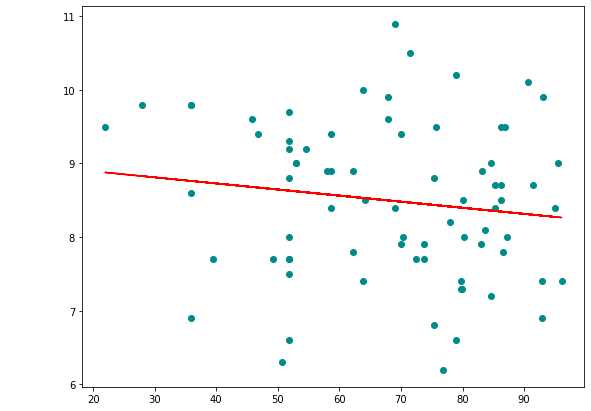

In [16]:
plt.figure(figsize = (9,7))
# plt.title('Weight vs Tumor Volume for Capomulin', size = 22)
# plt.xlabel('Mouse Weight',size= 19,  color= "darkblue")
# plt.ylabel('Avg Tumor Volume', size= 19,  color= "darkblue")

x_values = race_state_copd["Percent One Race White"]
y_values = race_state_copd["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")

# plt.savefig("Graphs/Scatter_Wt_TumorVol")
plt.show()

The r-squared value is: 0.0030203447624122205
The p-value is: 0.628253794212678


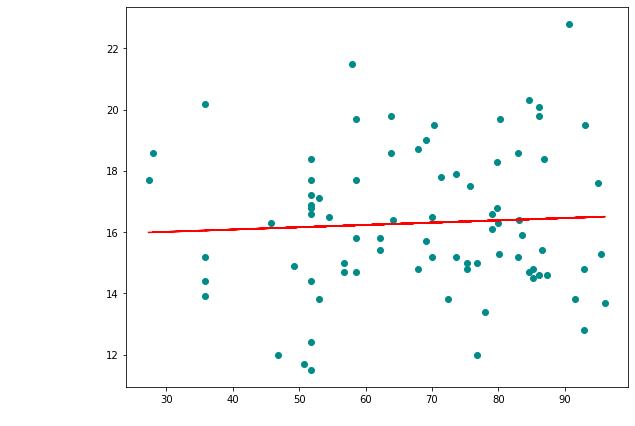

In [17]:
plt.figure(figsize = (9,7))
x_values = race_state_pneumonia["Percent One Race White"]
y_values = race_state_pneumonia["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")

plt.show()

The r-squared value is: 0.0032151563422561933
The p-value is: 0.6173697901951234


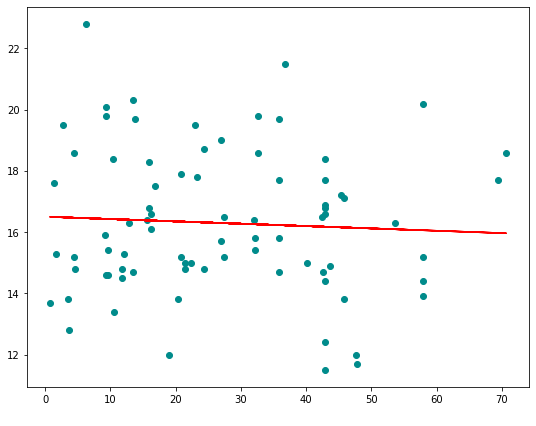

In [18]:
plt.figure(figsize = (9,7))

x_values = race_state_pneumonia["Percent One Race Black+"]
y_values = race_state_pneumonia["Mortality Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

plt.scatter(x_values, y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The p-value is: {pvalue}")

plt.show()